# African Heart Disease - Project 1

Link:
https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data

Information about data

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease

In [32]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from Data_preprocessing import *

## Load data

In [33]:
# # Load csv file and print the first 5 rows
# df = pd.read_csv('data/african_heart_disease_data.csv')
# print(df.head())

## Data Wrangling

In [34]:
# # Extract attribute names (excluding row names)
# attributeNames = df.columns[1:].tolist()  # Skip the first column

# # Convert categorical 'famhist' to numerical values
# df["famhist"] = df["famhist"].astype("category").cat.codes  # Convert Present/Absent to 1/0

# # Extract feature matrix X
# X = df.iloc[:, 1:].values  # Exclude row names

# # Compute dataset properties
# N, M = X.shape  # Number of observations and attributes

# # Print 
# print("Attribute names:")
# print(attributeNames)
# np.set_printoptions(suppress=True)  # Suppress scientific notation
# print("\nX:")
# print(X)
# print(f"\nX with {N} samples and {M} attributes.")

# df.iloc[:,:].values 

In [35]:
# Standardize data
# X_standardized = zscore(X, ddof=1)

## Data Visualization

### Boxplot
A boxplot is used to visualize the distribution of numerical (continuous) data.
These columns contain continuous numerical values, so therefore they are included in the boxplot:

sbp (Systolic Blood Pressure)
tobacco (Tobacco Consumption)
ldl (Low-Density Lipoprotein - "bad" cholesterol)
adiposity (Measure of body fat)
typea (Personality trait score)
obesity (Obesity index)
alcohol (Alcohol consumption)
age (Age of the subject)

In [36]:
# Data preparation
plot_data = df[["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]]
X_plot = plot_data.values
X_plot_standardized = zscore(X_plot, ddof=1)
attributeNames_plot = ["SBP", "Tobacco", "LDL", "Adiposity", "Type A", "Obesity", "Alcohol", "Age"]
M_plot = len(attributeNames_plot)
N_plot = X_plot.shape[0]



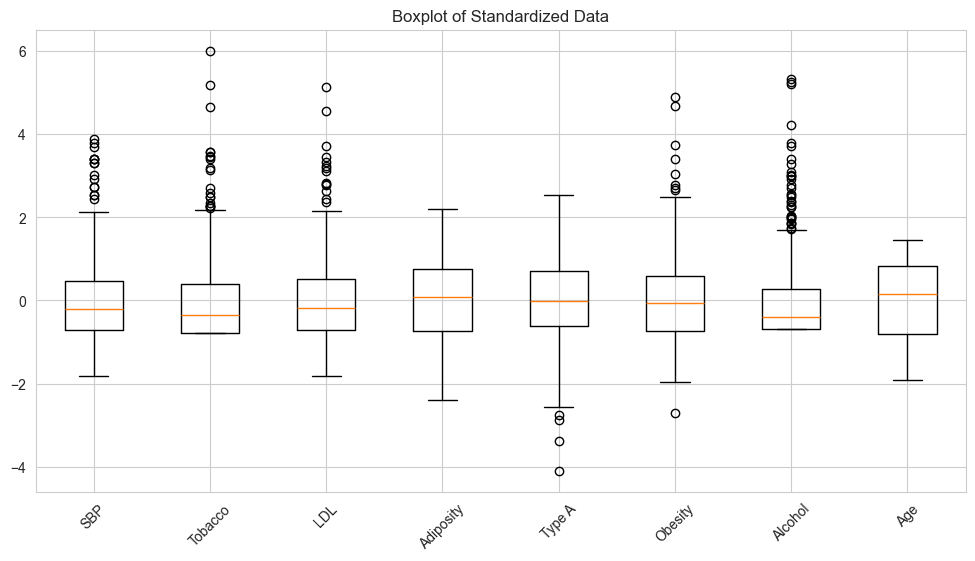

In [37]:
plt.figure(figsize=(12, 6))
plt.boxplot(X_plot_standardized)
plt.xticks(range(1, M_plot+1), attributeNames_plot, rotation=45)
plt.title("Boxplot of Standardized Data")
plt.show()

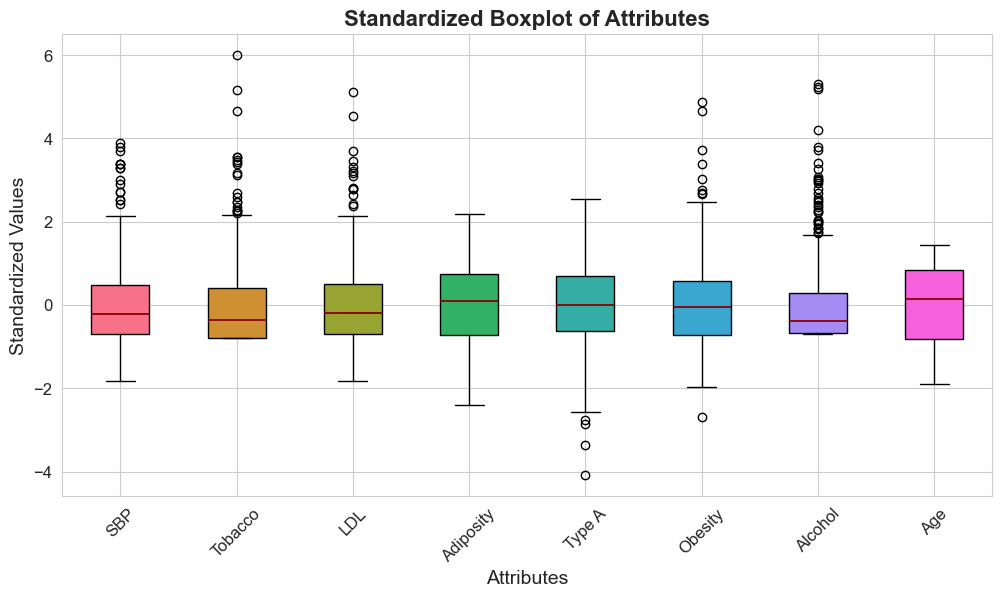

In [38]:
# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Create a colorful boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(X_plot_standardized, patch_artist=True,
                  medianprops={"color": "darkred", "linewidth": 1.3})  # Set the thickness of the red mean line

# Define a color palette
colors = sns.color_palette("husl", len(box["boxes"]))

# Color each box in the plot
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Customize ticks and labels
plt.xticks(range(1, M_plot+1), attributeNames_plot, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Standardized Boxplot of Attributes", fontsize=16, fontweight="bold")
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Standardized Values", fontsize=14)

# Show the plot
plt.savefig("plots/standardized_boxplot.png")
plt.show()






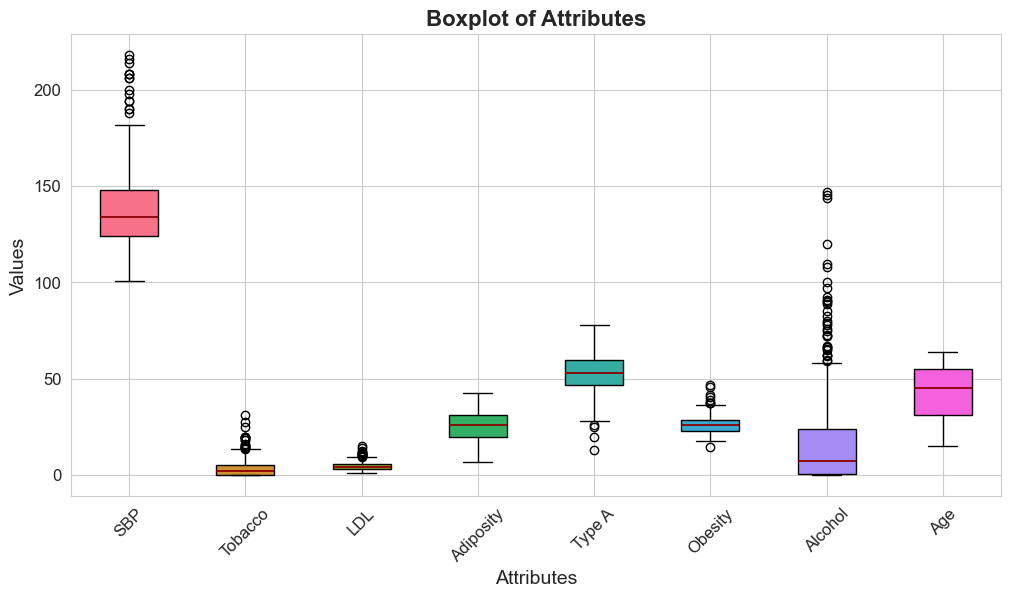

In [39]:
# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Create a colorful boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(X_plot, patch_artist=True,
                  medianprops={"color": "darkred", "linewidth": 1.3})  # Set the thickness of the red mean line

# Define a color palette
colors = sns.color_palette("husl", len(box["boxes"]))

# Color each box in the plot
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Customize ticks and labels
plt.xticks(range(1, M_plot+1), attributeNames_plot, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplot of Attributes", fontsize=16, fontweight="bold")
plt.xlabel("Attributes", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.savefig("plots/boxplot.png")
plt.show()






### Histogram

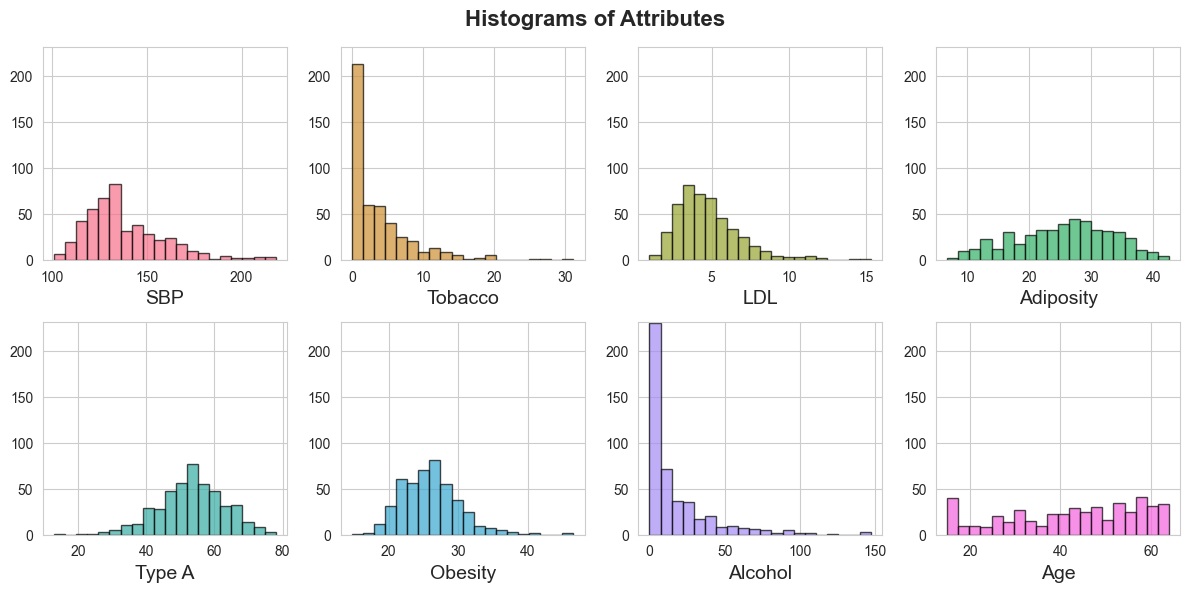

In [40]:
plt.figure(figsize=(12, 6))

# Calculate grid dimensions
u = np.floor(np.sqrt(M_plot))
v = np.ceil(float(M_plot) / u)

# Define a color palette for the histograms
colors = sns.color_palette("husl", M_plot)

# Loop through each attribute to create a subplot
for i in range(M_plot):
    plt.subplot(int(u), int(v), i + 1)  # Create subplot in grid
    plt.hist(X_plot[:, i], color=colors[i], bins=20, edgecolor='black', alpha=0.7)  # Create histogram with color
    plt.xlabel(attributeNames_plot[i], fontsize=14)  # Label for the x-axis
    plt.ylim(0, N_plot / 2)  # Set y-axis limits

plt.suptitle("Histograms of Attributes", fontsize=16, fontweight="bold")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig("plots/histograms.png")
plt.show()



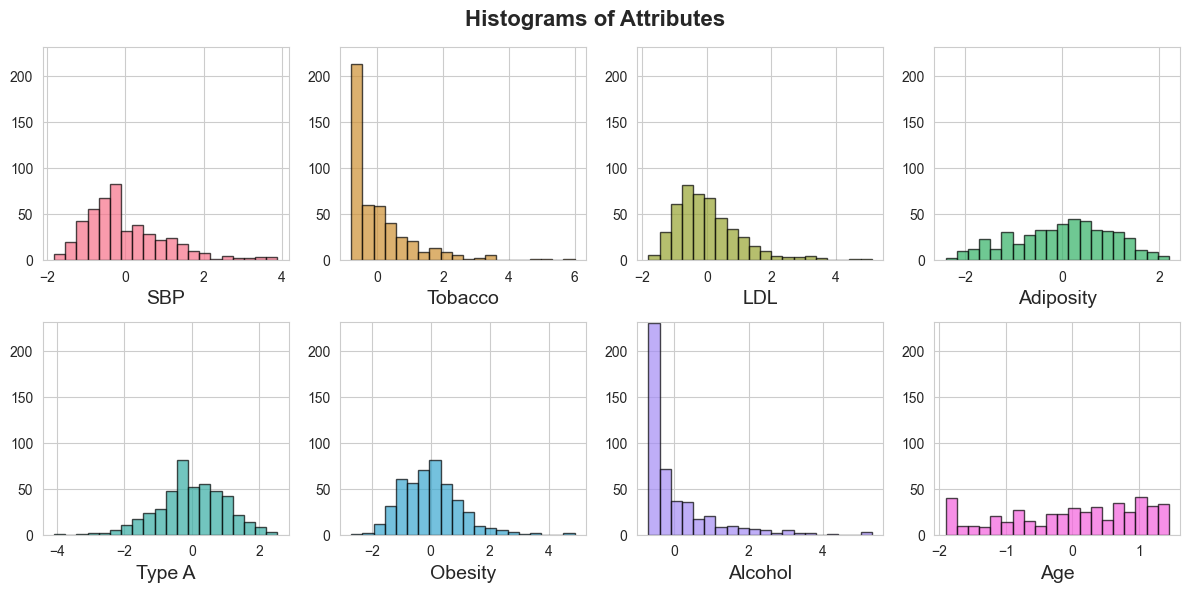

In [41]:
plt.figure(figsize=(12, 6))

# Calculate grid dimensions
u = np.floor(np.sqrt(M_plot))
v = np.ceil(float(M_plot) / u)

# Define a color palette for the histograms
colors = sns.color_palette("husl", M_plot)

# Loop through each attribute to create a subplot
for i in range(M_plot):
    plt.subplot(int(u), int(v), i + 1)  # Create subplot in grid
    plt.hist(X_plot_standardized[:, i], color=colors[i], bins=20, edgecolor='black', alpha=0.7)  # Create histogram with color
    plt.xlabel(attributeNames_plot[i], fontsize=14)  # Label for the x-axis
    plt.ylim(0, N_plot / 2)  # Set y-axis limits

plt.suptitle("Histograms of Attributes", fontsize=16, fontweight="bold")

# Adjust layout to avoid overlap
plt.tight_layout()
#plt.savefig("plots/histograms.png")
plt.show()



## Differences based on heart disease or not

C:\Users\trine\AppData\Local\Temp\ipykernel_11276\994140638.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="chd", y=col, data=df, ax=ax, palette=[colors[5], colors[0]])
C:\Users\trine\AppData\Local\Temp\ipykernel_11276\994140638.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No CHD", "CHD"], fontsize=10)
C:\Users\trine\AppData\Local\Temp\ipykernel_11276\994140638.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="chd", y=col, data=df, ax=ax, palette=[colors[5], colors[0]])
C:\Users\trine\AppData\Local\Temp\ipykernel_11276\994140638.py:24: UserWarning: set_ticklabels()

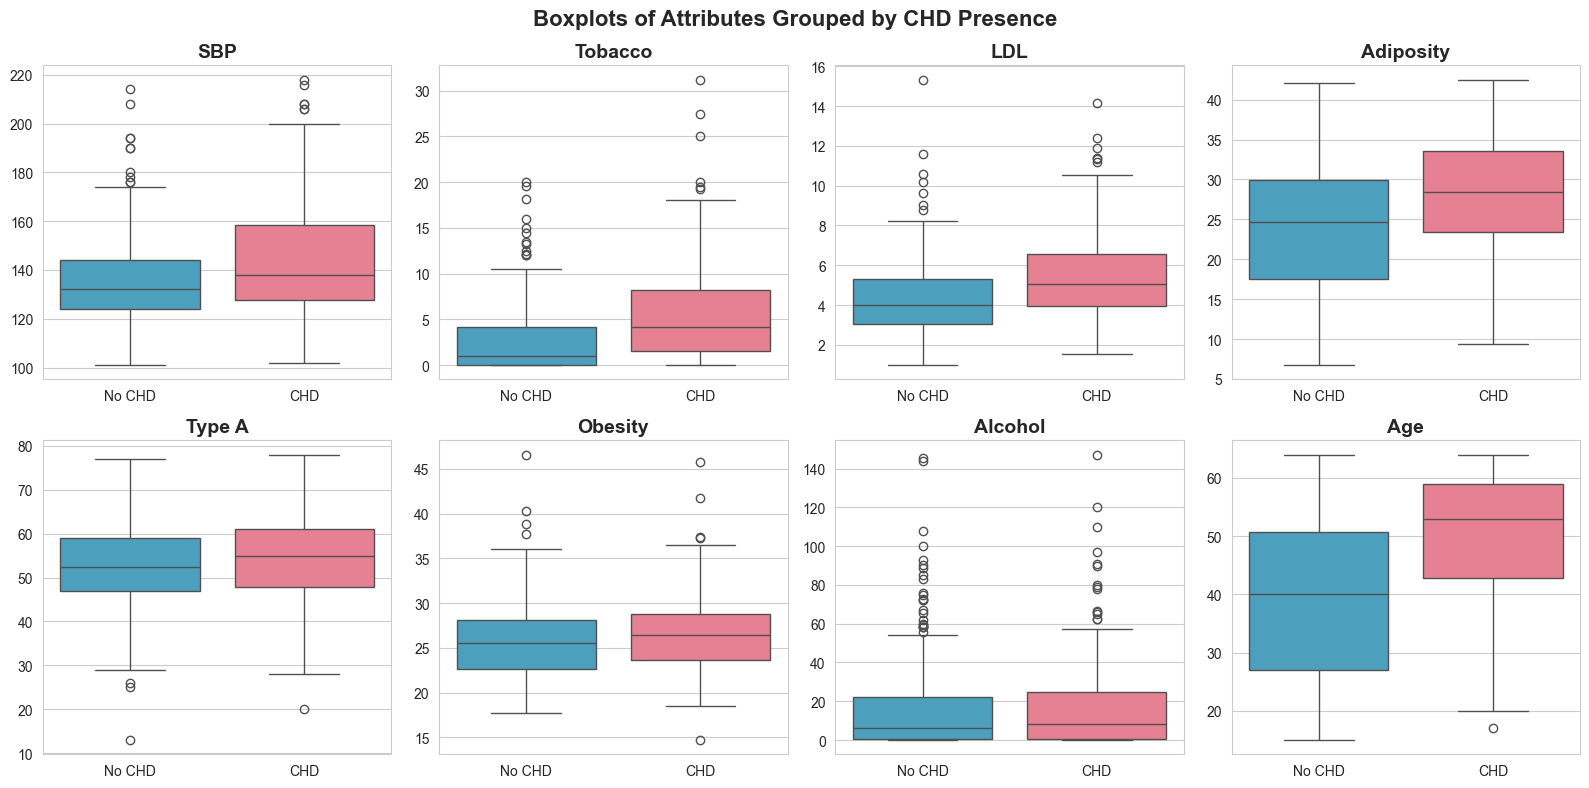

In [42]:


# Standardize data
numeric_cols = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]
df_standardized = df.copy()
df_standardized[numeric_cols] = zscore(df[numeric_cols], ddof=1)

# Define attribute names for display
attributeNames_plot = ["SBP", "Tobacco", "LDL", "Adiposity", "Type A", "Obesity", "Alcohol", "Age"]

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure with subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Define color palette
colors = sns.color_palette("husl", len(numeric_cols))

# Loop through attributes and plot boxplots for CHD=0 and CHD=1
for i, (ax, col, attr_name, color) in enumerate(zip(axes.flatten(), numeric_cols, attributeNames_plot, colors)):
    sns.boxplot(x="chd", y=col, data=df, ax=ax, palette=[colors[5], colors[0]])
    ax.set_title(attr_name, fontsize=14, fontweight="bold")
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("")
    ax.set_xticklabels(["No CHD", "CHD"], fontsize=10)

# Adjust layout and show the plot
plt.suptitle("Boxplots of Attributes Grouped by CHD Presence", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("plots/boxplots_chd.png")
plt.show()





## Barplot of famliy history

C:\Users\trine\AppData\Local\Temp\ipykernel_11276\717782036.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="famhist", data=df, palette=[colors[5], colors[0]], ax=axes[0], width=0.4, edgecolor="black")


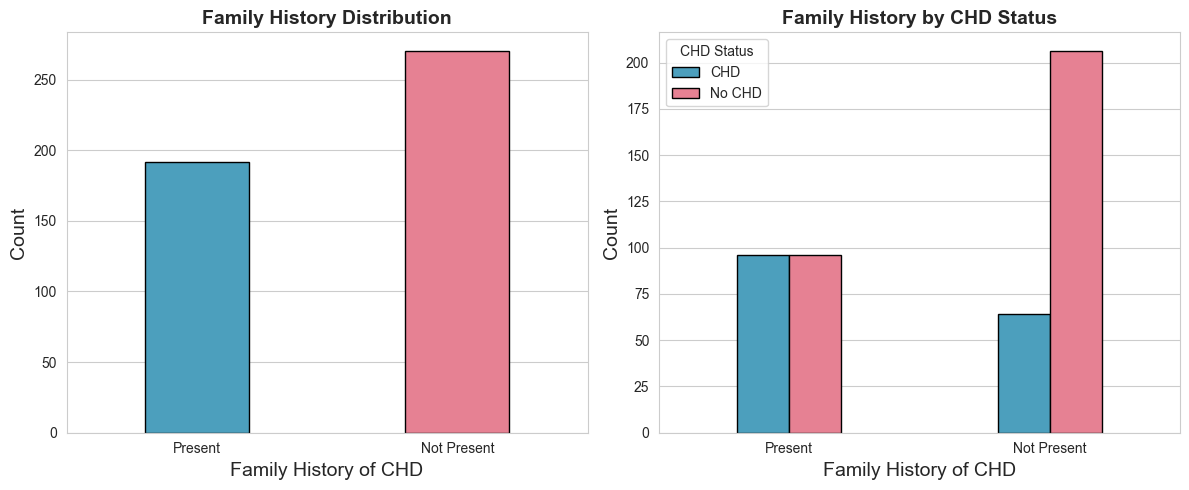

In [43]:
# Set Seaborn style
sns.set_style("whitegrid")

# Rename famhist and chd values for better readability
df["famhist"] = df["famhist"].replace({0: "Not Present", 1: "Present"})
df["chd"] = df["chd"].replace({0: "No CHD", 1: "CHD"})

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First plot: Family history count ---
sns.countplot(x="famhist", data=df, palette=[colors[5], colors[0]], ax=axes[0], width=0.4, edgecolor="black")
axes[0].set_xlabel("Family History of CHD", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].set_title("Family History Distribution", fontsize=14, fontweight="bold")

# --- Second plot: Family history grouped by CHD ---
sns.countplot(x="famhist", hue="chd", data=df, palette=[colors[5], colors[0]], ax=axes[1], width=0.4, edgecolor="black")
axes[1].set_xlabel("Family History of CHD", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].set_title("Family History by CHD Status", fontsize=14, fontweight="bold")
axes[1].legend(title="CHD Status")

# Adjust layout
plt.tight_layout()
plt.savefig("plots/family_history.png")
plt.show()


